# 時間序列繪圖

## 初始環境設定

In [23]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
# 指定默認字形：解決plot不能顯示中文問題
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
df=pd.read_excel('x.xlsx')

## 檢查屬性

In [24]:
df.dtypes

Time         datetime64[ns]
SO2                 float64
CO                  float64
O3                  float64
PM25                  int64
Nox                   int64
NO                  float64
NO2                 float64
THC                 float64
NMHC                float64
CH4                 float64
WindSpeed           float64
TEMP                float64
Humidity            float64
dtype: object

## 屬性轉換

In [25]:
df["SO2"] = pd.to_numeric(df.SO2, errors='coerce')
df["CO"] = pd.to_numeric(df.CO, errors='coerce')
#df["CO2"] = pd.to_numeric(df.CO2, errors='coerce')
df["O3"] = pd.to_numeric(df.O3, errors='coerce')
df["PM25"] = pd.to_numeric(df.PM25, errors='coerce')
df["Nox"] = pd.to_numeric(df.Nox, errors='coerce')
df["NO"] = pd.to_numeric(df.NO, errors='coerce')
df["NO2"] = pd.to_numeric(df.NO2, errors='coerce')
df["THC"] = pd.to_numeric(df.THC, errors='coerce')
df["NMHC"] = pd.to_numeric(df.NMHC, errors='coerce')
df["CH4"] = pd.to_numeric(df.CH4, errors='coerce')
df["WindSpeed"] = pd.to_numeric(df.WindSpeed, errors='coerce')
df["TEMP"] = pd.to_numeric(df.TEMP, errors='coerce')
df["Humidity"] = pd.to_numeric(df.Humidity, errors='coerce')

In [26]:
df.head(10)

,Time,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity
0,1983-10-01,52.1,0.00,0.0,0,38,10.65,27.38,0.0,0.0,0.0,0.0,0.0,88.98
1,1983-11-01,49.3,0.00,0.0,0,48,14.52,33.14,0.0,0.0,0.0,0.0,0.0,76.49
2,1983-12-01,52.7,0.00,0.0,0,53,17.68,34.92,0.0,0.0,0.0,0.0,0.0,77.42
3,1984-01-01,57.5,1.25,15.3,0,56,20.41,34.68,0.0,0.0,0.0,0.0,0.0,81.62
4,1984-02-01,62.8,1.33,7.3,0,49,23.01,25.29,0.0,0.0,0.0,0.0,0.0,81.47
5,1984-03-01,45.9,2.06,7.8,0,41,23.20,22.37,0.0,0.0,0.0,0.0,0.0,78.78
6,1984-04-01,43.1,2.32,7.7,0,32,15.44,17.17,0.0,0.0,0.0,0.0,0.0,81.93
7,1984-06-01,19.9,1.07,0.0,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,75.56
8,1984-07-01,27.5,1.13,7.5,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,70.63
9,1984-08-01,40.3,1.97,18.5,0,16,8.16,9.85,0.0,0.0,0.0,0.0,0.0,59.42


In [27]:
df.dtypes

Time         datetime64[ns]
SO2                 float64
CO                  float64
O3                  float64
PM25                  int64
Nox                   int64
NO                  float64
NO2                 float64
THC                 float64
NMHC                float64
CH4                 float64
WindSpeed           float64
TEMP                float64
Humidity            float64
dtype: object

Text(0.5, 1.0, '1982年11月至2018年11月之PM2.5趨勢變化圖')

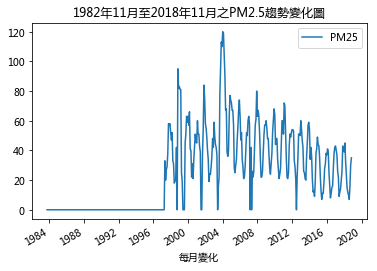

In [28]:
ax=df.plot(x='Time',y='PM25')
ax.set_xlabel('每月變化')
ax.set_title('1982年11月至2018年11月之PM2.5趨勢變化圖')

Text(0.5, 1.0, '1982年11月至2018年11月之SO2趨勢變化圖')

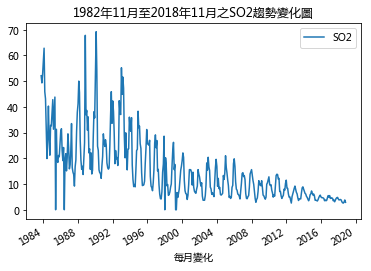

In [29]:
ax=df.plot(x='Time',y='SO2')
ax.set_xlabel('每月變化')
ax.set_title('1982年11月至2018年11月之SO2趨勢變化圖')

Text(0.5, 1.0, '1982年11月至2018年11月之NO2趨勢變化圖')

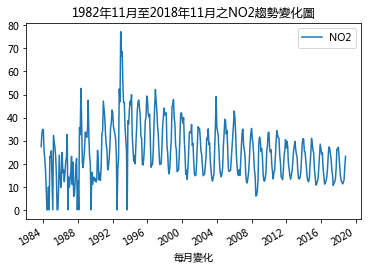

In [30]:
ax=df.plot(x='Time',y='NO2')
ax.set_xlabel('每月變化')
ax.set_title('1982年11月至2018年11月之NO2趨勢變化圖')

In [31]:
df.corr()[['PM25']].sort_values('PM25')  

,PM25
SO2,-0.390866
CO,-0.281130
NO,-0.052068
TEMP,-0.011507
WindSpeed,0.026202
Nox,0.064767
Humidity,0.067706
NO2,0.189960
CH4,0.288384
THC,0.304333


In [32]:
X = df[['SO2', 'CO', 'O3', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4', 'WindSpeed','TEMP','Humidity']]

y = df['PM25']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [34]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(20)

In [37]:
df1

,Actual,Predicted
288,63,70.074033
258,47,51.746660
351,25,24.526875
6,0,-20.193842
295,50,51.276474
1,0,-4.902003
21,0,12.186013
122,0,23.557812
232,16,21.982050
150,0,28.333573


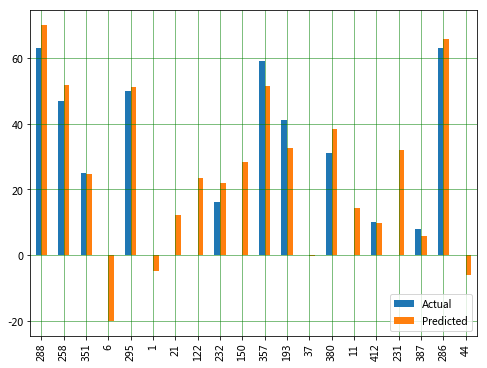

In [38]:
df1.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, y_pred))  
print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, y_pred))  

The Explained Variance: 0.45
The Mean Absolute Error: 15.36 
The Median Absolute Error: 11.26 


# 神經網路

In [40]:
import pandas as pd  
import numpy as np  
import tensorflow as tf  
from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  

In [41]:
df=pd.read_excel('x.xlsx')
# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
SO2,417.0,15.269544,12.509458,0.0,5.80,11.10,20.400,69.200
CO,417.0,0.935971,0.518453,0.0,0.61,0.81,1.160,3.560
O3,417.0,21.918465,9.440116,0.0,15.70,21.70,28.200,48.100
PM25,417.0,25.592326,26.584440,0.0,0.00,22.00,45.000,120.000
Nox,417.0,36.482014,19.845807,0.0,22.00,31.00,47.000,129.000
NO,417.0,11.170456,9.509676,0.0,4.29,8.09,14.870,50.810
NO2,417.0,24.855947,11.721379,0.0,16.07,23.80,32.500,77.250
THC,417.0,0.679314,1.025742,0.0,0.00,0.00,2.049,2.620
NMHC,417.0,0.091542,0.149597,0.0,0.00,0.00,0.197,0.596
CH4,417.0,0.587820,0.886352,0.0,0.00,0.00,1.808,2.095


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 14 columns):
Time         417 non-null datetime64[ns]
SO2          417 non-null float64
CO           417 non-null float64
O3           417 non-null float64
PM25         417 non-null int64
Nox          417 non-null int64
NO           417 non-null float64
NO2          417 non-null float64
THC          417 non-null float64
NMHC         417 non-null float64
CH4          417 non-null float64
WindSpeed    417 non-null float64
TEMP         417 non-null float64
Humidity     417 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(2)
memory usage: 45.7 KB


In [43]:
X = df[['SO2', 'CO', 'O3', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4', 'WindSpeed','TEMP','Humidity']]


In [44]:
y = df['PM25']  

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [46]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1])) 

Training instances   333, Training features   12
Validation instances 42, Validation features 12
Testing instances    42, Testing features    12


In [47]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]  

In [48]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,  
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000001876CCF8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):  
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [50]:
wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400)

<function tensorflow.python.estimator.inputs.pandas_io.pandas_input_fn.<locals>.input_fn()>

In [87]:
evaluations = []  
STEPS = 400  
for i in range(100):  
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 7347.2437, step = 25601
INFO:tensorflow:global_step/sec: 200.32
INFO:tensorflow:loss = 8250.439, step = 25701 (0.499 sec)
INFO:tensorflow:global_step/sec: 213.675
INFO:tensorflow:loss = 6901.4443, step = 25801 (0.468 sec)
INFO:tensorflow:global_step/sec: 228.937
INFO:tensorflow:loss = 9684.098, step = 25901 (0.437 sec)
INFO:tensorflow:Saving checkpoints for 26000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9538.019.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:46:05
INFO:tensorflow:Graph

INFO:tensorflow:Saving checkpoints for 28000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9721.918.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:46:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-28000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:46:25
INFO:tensorflow:Saving dict for global step 28000: average_loss = 673.9728, global_step = 28000, label/mean = 30.261906, loss = 28306.857, prediction/mean = 24.969965
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 28000: tf_wx_model\model.ckpt-28000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-28000
INFO

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 30000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 7238.931, step = 30001
INFO:tensorflow:global_step/sec: 206.782
INFO:tensorflow:loss = 7359.837, step = 30101 (0.484 sec)
INFO:tensorflow:global_step/sec: 228.937
INFO:tensorflow:loss = 6257.5254, step = 30201 (0.437 sec)
INFO:tensorflow:global_step/sec: 228.937
INFO:tensorflow:loss = 7500.867, step = 30301 (0.437 sec)
INFO:tensorflow:Saving checkpoints for 30400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 7814.367.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:46:48
INFO:tensorflow:Graph

INFO:tensorflow:Saving checkpoints for 32400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 6841.6895.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:47:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-32400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:47:07
INFO:tensorflow:Saving dict for global step 32400: average_loss = 739.88556, global_step = 32400, label/mean = 30.261906, loss = 31075.193, prediction/mean = 26.549337
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 32400: tf_wx_model\model.ckpt-32400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-32400
IN

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-34400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 34400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5533.8057, step = 34401
INFO:tensorflow:global_step/sec: 206.782
INFO:tensorflow:loss = 6024.252, step = 34501 (0.484 sec)
INFO:tensorflow:global_step/sec: 221.043
INFO:tensorflow:loss = 6831.3457, step = 34601 (0.452 sec)
INFO:tensorflow:global_step/sec: 228.937
INFO:tensorflow:loss = 6854.507, step = 34701 (0.437 sec)
INFO:tensorflow:Saving checkpoints for 34800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 6732.0938.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:47:29
INFO:tensorflow:Gra

INFO:tensorflow:Saving checkpoints for 36800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 6102.8633.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:47:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-36800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:47:48
INFO:tensorflow:Saving dict for global step 36800: average_loss = 824.6902, global_step = 36800, label/mean = 30.261906, loss = 34636.99, prediction/mean = 24.999195
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 36800: tf_wx_model\model.ckpt-36800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-36800
INFO

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-38800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5781.4927, step = 38801
INFO:tensorflow:global_step/sec: 200.32
INFO:tensorflow:loss = 8642.68, step = 38901 (0.499 sec)
INFO:tensorflow:global_step/sec: 173.25
INFO:tensorflow:loss = 5476.9307, step = 39001 (0.593 sec)
INFO:tensorflow:global_step/sec: 156.347
INFO:tensorflow:loss = 6467.28, step = 39101 (0.624 sec)
INFO:tensorflow:Saving checkpoints for 39200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4076.791.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:48:11
INFO:tensorflow:Graph wa

INFO:tensorflow:Saving checkpoints for 41200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5961.312.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:48:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-41200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:48:30
INFO:tensorflow:Saving dict for global step 41200: average_loss = 870.95087, global_step = 41200, label/mean = 30.261906, loss = 36579.938, prediction/mean = 25.378933
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 41200: tf_wx_model\model.ckpt-41200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-41200
INF

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-43200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 43200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 6612.158, step = 43201
INFO:tensorflow:global_step/sec: 123.274
INFO:tensorflow:loss = 5154.754, step = 43301 (0.811 sec)
INFO:tensorflow:global_step/sec: 183.15
INFO:tensorflow:loss = 4421.271, step = 43401 (0.546 sec)
INFO:tensorflow:global_step/sec: 228.937
INFO:tensorflow:loss = 4384.945, step = 43501 (0.452 sec)
INFO:tensorflow:Saving checkpoints for 43600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4985.9478.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:48:54
INFO:tensorflow:Graph 

INFO:tensorflow:Saving checkpoints for 45600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4884.712.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:49:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-45600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:49:13
INFO:tensorflow:Saving dict for global step 45600: average_loss = 889.06976, global_step = 45600, label/mean = 30.261906, loss = 37340.93, prediction/mean = 25.310041
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 45600: tf_wx_model\model.ckpt-45600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-45600
INFO

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-47600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 47600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4729.255, step = 47601
INFO:tensorflow:global_step/sec: 168.691
INFO:tensorflow:loss = 6148.1694, step = 47701 (0.593 sec)
INFO:tensorflow:global_step/sec: 188.537
INFO:tensorflow:loss = 5940.3066, step = 47801 (0.530 sec)
INFO:tensorflow:global_step/sec: 183.15
INFO:tensorflow:loss = 7556.6045, step = 47901 (0.546 sec)
INFO:tensorflow:Saving checkpoints for 48000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5425.3525.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:49:36
INFO:tensorflow:Gra

INFO:tensorflow:Saving checkpoints for 50000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4139.503.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:49:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:49:56
INFO:tensorflow:Saving dict for global step 50000: average_loss = 908.3519, global_step = 50000, label/mean = 30.261906, loss = 38150.78, prediction/mean = 24.564974
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 50000: tf_wx_model\model.ckpt-50000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-50000
INFO:

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-52000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 52000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3848.2144, step = 52001
INFO:tensorflow:global_step/sec: 206.782
INFO:tensorflow:loss = 4314.703, step = 52101 (0.499 sec)
INFO:tensorflow:global_step/sec: 221.043
INFO:tensorflow:loss = 4043.2537, step = 52201 (0.437 sec)
INFO:tensorflow:global_step/sec: 237.416
INFO:tensorflow:loss = 3981.589, step = 52301 (0.437 sec)
INFO:tensorflow:Saving checkpoints for 52400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4888.6978.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:50:17
INFO:tensorflow:Gra

INFO:tensorflow:Saving checkpoints for 54400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4731.673.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:50:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-54400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:50:36
INFO:tensorflow:Saving dict for global step 54400: average_loss = 897.4892, global_step = 54400, label/mean = 30.261906, loss = 37694.547, prediction/mean = 24.965382
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 54400: tf_wx_model\model.ckpt-54400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-54400
INFO

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-56400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 56400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4059.5098, step = 56401
INFO:tensorflow:global_step/sec: 206.782
INFO:tensorflow:loss = 4388.2812, step = 56501 (0.499 sec)
INFO:tensorflow:global_step/sec: 228.937
INFO:tensorflow:loss = 4859.4717, step = 56601 (0.437 sec)
INFO:tensorflow:global_step/sec: 221.043
INFO:tensorflow:loss = 4245.508, step = 56701 (0.437 sec)
INFO:tensorflow:Saving checkpoints for 56800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3883.5293.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:50:58
INFO:tensorflow:Gr

INFO:tensorflow:Saving checkpoints for 58800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4531.774.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:51:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-58800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:51:17
INFO:tensorflow:Saving dict for global step 58800: average_loss = 889.79956, global_step = 58800, label/mean = 30.261906, loss = 37371.582, prediction/mean = 25.520481
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 58800: tf_wx_model\model.ckpt-58800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-58800
INF

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-60800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 60800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5276.8643, step = 60801
INFO:tensorflow:global_step/sec: 200.32
INFO:tensorflow:loss = 5132.69, step = 60901 (0.499 sec)
INFO:tensorflow:global_step/sec: 221.043
INFO:tensorflow:loss = 5066.3936, step = 61001 (0.452 sec)
INFO:tensorflow:global_step/sec: 221.043
INFO:tensorflow:loss = 5131.88, step = 61101 (0.468 sec)
INFO:tensorflow:Saving checkpoints for 61200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4231.4087.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:51:38
INFO:tensorflow:Graph 

INFO:tensorflow:Saving checkpoints for 63200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3904.4353.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:51:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-63200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-27-00:51:57
INFO:tensorflow:Saving dict for global step 63200: average_loss = 901.01294, global_step = 63200, label/mean = 30.261906, loss = 37842.543, prediction/mean = 24.024443
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 63200: tf_wx_model\model.ckpt-63200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-63200
IN

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-65200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 65200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4431.1846, step = 65201
INFO:tensorflow:global_step/sec: 213.675
INFO:tensorflow:loss = 4762.138, step = 65301 (0.484 sec)
INFO:tensorflow:global_step/sec: 228.937
INFO:tensorflow:loss = 5548.957, step = 65401 (0.421 sec)
INFO:tensorflow:global_step/sec: 228.937
INFO:tensorflow:loss = 3697.1814, step = 65501 (0.437 sec)
INFO:tensorflow:Saving checkpoints for 65600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4769.8965.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-27-00:52:18
INFO:tensorflow:Gra

In [88]:
evaluations[0]  

{'average_loss': 620.3411,
 'label/mean': 30.261906,
 'loss': 26054.326,
 'prediction/mean': 26.565226,
 'global_step': 26000}

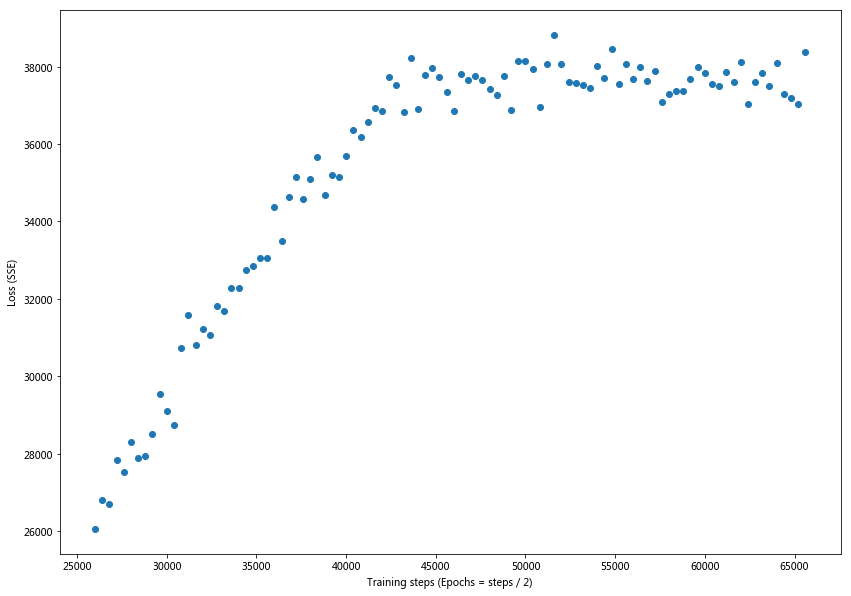

In [89]:
import matplotlib.pyplot as plt  
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps (Epochs = steps / 2)')  
plt.ylabel('Loss (SSE)')  
plt.show()  

In [90]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,  
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(  
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f " % mean_absolute_error(  
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f " % median_absolute_error(  
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-65600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.27
The Mean Absolute Error: 15.86 
The Median Absolute Error: 4.26 
